# Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. 

Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

# Используемые иснтрументы

Matplotlib  
Pandas  
Python  
Scikit-learn

# Цель проекта

Построить модель, определяющую подходящий тариф с точностью не менее 0,75.

<h1>Структура проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-и-изучите-файл" data-toc-modified-id="Откройте-и-изучите-файл"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с набором данных</a></span></li></ul></div>
<div class="toc"><ul class="toc-item"><li><span><a href="#Разбейте-данные-на-выборки" data-toc-modified-id="Разбейте-данные-на-выборки"><span class="toc-item-num">2&nbsp;&nbsp;</span>Формирование выборок</a></span></li></ul></div>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследуйте-модели" data-toc-modified-id="Исследуйте-модели"><span class="toc-item-num">3&nbsp;&nbsp;</span>Моделирование</a></span></li></ul></div>
<div class="toc"><ul class="toc-item"><li><span><a href="#Проверьте-модель-на-тестовой-выборке" data-toc-modified-id="Проверьте-модель-на-тестовой-выборке"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li></ul></div>
<div class="toc"><ul class="toc-item"><li><span><a href="#(бонус)-Проверьте-модели-на-адекватность" data-toc-modified-id="(бонус)-Проверьте-модели-на-адекватность"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></div>

## Знакомство с набором данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn. metrics import classification_report

In [2]:
df=pd.read_csv('E://Data//_Projects//datasets//users_behavior.csv')
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


Постараемся составить общее впечатление о датасете.

In [3]:
df.shape

(3214, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [6]:
df['is_ultra'].unique()

array([0, 1], dtype=int64)

In [7]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

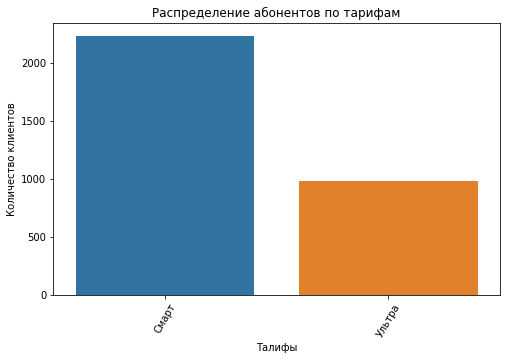

In [30]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=60)
# count plot on single categorical variable
sns.countplot(x ='is_ultra', data= df, order= df['is_ultra'].value_counts().index)
 
# Show the plot
plt.title('Распределение абонентов по тарифам')
plt.xlabel('Талифы')
plt.xticks([0,1],['Смарт', 'Ультра'])
plt.ylabel('Количество клиентов')
plt.show()

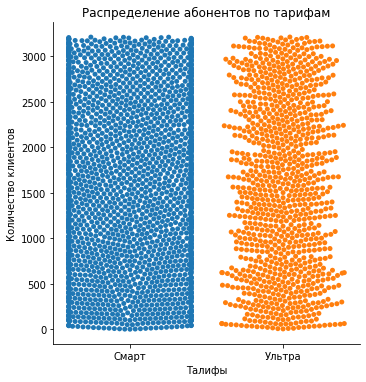

In [31]:
y=df.index
sns.catplot(kind="swarm", x="is_ultra", y=y, data=df)
plt.title('Распределение абонентов по тарифам')
plt.xlabel('Талифы')
plt.xticks([0,1],['Смарт', 'Ультра'])
plt.ylabel('Количество клиентов')
plt.show()
plt.show()

# Вывод:
Данные высококачественные, пропусков нет, данных в каждой категории достаточно, для решенрия задачи классификации.
Роевая диаграмма показывает, что соотношение классов достаточно равномерное.

## Формирование выборок <a href="#Разбейте-данные-на-выборки" data-toc-modified-id="Разбейте-данные-на-выборки">

Сделаем обучающую и тестовую выборку. И ещё немного оставим для валидации.

In [10]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']
X_split, X_valid, Y_split, Y_valid = train_test_split(features, target, test_size=0.2, random_state=123)
X_train, X_test, Y_train, Y_test = train_test_split(X_split, Y_split, test_size=0.2, random_state=123)

print(X_train.shape,X_test.shape, X_valid.shape)

(2056, 4) (515, 4) (643, 4)


In [11]:
smpls=pd.DataFrame()
smpls['train']=Y_train.value_counts()
smpls['test']=Y_test.value_counts()
smpls['valid']=Y_valid.value_counts()
smpls

,train,test,valid
0,1429,350,450
1,627,165,193


# Вывод:

Получились достаточно большие наборы данных, чтобы достичь целевой точности рекомендаций модели.
Проверили, что все выборки содержат достаточное количество значений целевого признака обоих типов. Теперь точно можно не опасаться, что будет жёстки дисбаланс на каком-то этапе.

## Моделирование

Возьмём набор моделей-классификаторов из бибилиотеки sklearn

In [12]:
from sklearn import linear_model
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB()
}

Напишем процедуру, обучающую модели по предложенным выборкам, и сразу же считал статистику по всем.

In [13]:
def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 5, verbose = True):
    
    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        t_start = time.perf_counter()
        classifier.fit(X_train, Y_train)
        t_end = time.perf_counter()
        
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        
        dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score, 'train_time': t_diff}
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=classifier_name, f=t_diff))
    return dict_models

Добавим процедуру, которая красиво будет выводить получившуюся статистику

In [14]:
def display_dict_models(dict_models, sort_by='test_score'):
    cls = [key for key in dict_models.keys()]
    test_s = [dict_models[key]['test_score'] for key in cls]
    training_s = [dict_models[key]['train_score'] for key in cls]
    training_t = [dict_models[key]['train_time'] for key in cls]
    
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),4)), columns = ['classifier', 'train_score', 'test_score', 'train_time'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'train_score'] = training_s[ii]
        df_.loc[ii, 'test_score'] = test_s[ii]
        df_.loc[ii, 'train_time'] = training_t[ii]
    
    display(df_.sort_values(by=sort_by, ascending=False))

In [15]:
dict_models = batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 8)
display_dict_models(dict_models)

trained Logistic Regression in 0.00 s
trained Nearest Neighbors in 0.00 s
trained Linear SVM in 0.05 s
trained Gradient Boosting Classifier in 2.17 s
trained Decision Tree in 0.01 s
trained Random Forest in 4.83 s
trained Neural Net in 0.18 s
trained Naive Bayes in 0.00 s


,classifier,train_score,test_score,train_time
5,Random Forest,1.000000,0.792233,4.826544
3,Gradient Boosting Classifier,0.981031,0.778641,2.168608
7,Naive Bayes,0.785019,0.770874,0.002170
1,Nearest Neighbors,0.814689,0.733981,0.001808
2,Linear SVM,0.738813,0.732039,0.046494
0,Logistic Regression,0.721304,0.699029,0.004329
4,Decision Tree,1.000000,0.685437,0.005794
6,Neural Net,0.305447,0.320388,0.176208


Теперь оптимизируем гиперпараметры нескольких моделей

In [16]:
def check_best_score(cllf,X_t,Y_t,X_v,Y_v):
                cllf.fit(X_t, Y_t)
                train_score1 = clf.score(X_t, Y_t)
                test_score1 = clf.score(X_v, Y_v)
                return train_score1,test_score1

GDB_params = {
    'random_state':[239, 0,163],
    'min_samples_split':[2,4,6],
    'min_weight_fraction_leaf':[0.0, 0.1,0.5],
    'max_depth': [None, 2, 5, 10, 15]
}
dict_classifiers_opt={
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}
x_score=0.75

best_model=RandomForestClassifier(n_estimators=100, 
                                             max_depth = 1,
                                             criterion = 'gini', min_samples_split=2)
for r_state in GDB_params['random_state']:
    for msl in GDB_params['min_samples_split']:
        for mwfl in GDB_params['min_weight_fraction_leaf']:
            for md in GDB_params['max_depth']:
                clf = GradientBoostingClassifier(random_state=r_state, 
                                             min_samples_split = msl,
                                             min_weight_fraction_leaf = mwfl, max_depth=md)
                train_score, test_score=check_best_score(clf,X_train, Y_train,X_test, Y_test)
                if test_score>x_score:
                    print("For ({}, {}, {}, {},{}) - train, test score: \t {:.5f} \t-\t {:.5f}".format("GradientBoostingClassifier", r_state, msl, mwfl,md, train_score, test_score))
                    x_score=test_score
                    best_model=clf
                clf = tree.DecisionTreeClassifier(random_state=r_state, 
                                             min_samples_split = msl,
                                             min_weight_fraction_leaf = mwfl, max_depth=md)
                train_score, test_score=check_best_score(clf,X_train, Y_train,X_test, Y_test)
                if test_score>x_score:
                    print("For ({}, {}, {}, {},{}) - train, test score: \t {:.5f} \t-\t {:.5f}".format("DecisionTreeClassifier", r_state, msl, mwfl,md, train_score, test_score))
                    x_score=test_score
                    best_model=clf
                clf = RandomForestClassifier(random_state=r_state, 
                                             min_samples_split = msl,
                                             min_weight_fraction_leaf = mwfl, max_depth=md)
                train_score, test_score=check_best_score(clf,X_train, Y_train,X_test, Y_test)
                if test_score>x_score:
                    print("For ({}, {}, {}, {},{}) - train, test score: \t {:.5f} \t-\t {:.5f}".format("RandomForestClassifier", r_state, msl, mwfl,md, train_score, test_score))
                    x_score=test_score
                    best_model=clf
print("Оптимизация закончена")

For (RandomForestClassifier, 239, 2, 0.0,None) - train, test score: 	 1.00000 	-	 0.79029
For (RandomForestClassifier, 239, 2, 0.0,10) - train, test score: 	 0.89591 	-	 0.79417
For (RandomForestClassifier, 239, 4, 0.0,None) - train, test score: 	 0.99076 	-	 0.79612
For (RandomForestClassifier, 239, 4, 0.0,10) - train, test score: 	 0.89154 	-	 0.80000
For (RandomForestClassifier, 239, 4, 0.0,15) - train, test score: 	 0.93288 	-	 0.80388
Оптимизация закончена


## Проверка модели на валидационной выборке

In [17]:
dict_models = batch_classify(X_train, Y_train, X_valid, Y_valid, no_classifiers = 8)
display_dict_models(dict_models)
print('test score - после оптимизации гиперпараметров')
display(best_model.score(X_valid, Y_valid))

trained Logistic Regression in 0.01 s
trained Nearest Neighbors in 0.00 s
trained Linear SVM in 0.09 s
trained Gradient Boosting Classifier in 3.51 s
trained Decision Tree in 0.01 s
trained Random Forest in 5.03 s
trained Neural Net in 0.13 s
trained Naive Bayes in 0.00 s


,classifier,train_score,test_score,train_time
5,Random Forest,1.000000,0.800933,5.025802
3,Gradient Boosting Classifier,0.981031,0.796267,3.507632
1,Nearest Neighbors,0.814689,0.780715,0.003739
7,Naive Bayes,0.785019,0.776050,0.001684
2,Linear SVM,0.738813,0.760498,0.091632
4,Decision Tree,1.000000,0.716952,0.010031
6,Neural Net,0.707685,0.715397,0.131808
0,Logistic Regression,0.721304,0.712286,0.009572


test score - после оптимизации гиперпараметров


0.80248833592535

# Вывод:
Лучшее качество по точности предложения тарифов нашим клиентам показала модель на основе "случайного леса". Перебирая значения гиперпарамтеров удалось достичь точности в 80,2% на валидационной выборке, что несколько лучше целевого значения в 75%. Но достаточно ли хорошо это будет для реальных пользователей? Проведём тест на адекватность.

## Проверка модели на адекватность

Сначала посмотрим какую точность дал бы "примитивный алгоритм" на месте нашей модели.

In [18]:
str=["most_frequent", "prior", "stratified", "uniform"]
for i in str:
    dummy_clf = DummyClassifier(strategy=i)
    dummy_clf.fit(X_train,Y_train)
    y_pred=dummy_clf.predict(X_valid)
    print("Стратегия",i,"************************\n", classification_report(Y_valid, y_pred,target_names = ['Смарт', 'Ультра']))

Стратегия most_frequent ************************
               precision    recall  f1-score   support

       Смарт       0.70      1.00      0.82       450
      Ультра       0.00      0.00      0.00       193

    accuracy                           0.70       643
   macro avg       0.35      0.50      0.41       643
weighted avg       0.49      0.70      0.58       643

Стратегия prior ************************
               precision    recall  f1-score   support

       Смарт       0.70      1.00      0.82       450
      Ультра       0.00      0.00      0.00       193

    accuracy                           0.70       643
   macro avg       0.35      0.50      0.41       643
weighted avg       0.49      0.70      0.58       643

Стратегия stratified ************************
               precision    recall  f1-score   support

       Смарт       0.72      0.72      0.72       450
      Ультра       0.36      0.36      0.36       193

    accuracy                           0.61

In [19]:
y_pred=best_model.predict(X_valid)
print(classification_report(Y_valid,y_pred,target_names = ['Смарт', 'Ультра']))

              precision    recall  f1-score   support

       Смарт       0.82      0.91      0.87       450
      Ультра       0.73      0.54      0.62       193

    accuracy                           0.80       643
   macro avg       0.78      0.73      0.74       643
weighted avg       0.80      0.80      0.79       643



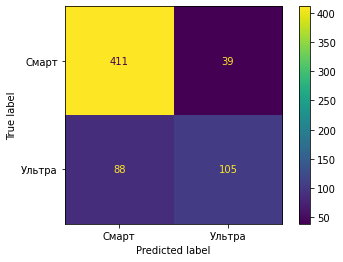

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Смарт', 'Ультра'])
disp.plot()
plt.show()

# Вывод:

Accuracy : Из всех клиентов, которым модель предлагала тариф "Ультра", его выбрали аж 73% .

Recall : из всех клиентов, которые действительно выбрали тариф "Ультра", модель правильно предсказала этот результат только для 54% этих клиентов. *Очень печально, что этот показатель лишь немного превосходит результаты "примитивного алгоритма" со стратегией "uniform" - испльзующей равную веротяность для каждого тарифа.

F1-score : Поскольку это значение не очень близко к 1, но всё-таки больше 0,5 это говорит нам о том, что модель не так уж хорошо предсказывает, будут ли клиенты выбирать тариф "Ультра", *но всё-таки показывает более точные результаты чем у "примитивного алгоритма".* **Модель склонна недостаточно активно предлагать талиф "Ультра", где клиент бы его был готов купить.**

Support : эти значения просто говорят нам, сколько клинетов выбрало каждый тариф в валидационном наборе данных. Мы видим, что  450 выбрали "Смарт", а 193 - "Ультра".

***